In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('C:/Users/SowmyaDevaraj/Documents/Text Representation/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["label", "message"]

In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df['label_num']=df['label'].map({
    'ham':0,
    'spam':1
})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
import gensim
df['text_clean'] = df['message'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [8]:
df.head()

,label,message,label_num,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entry, in, wkly, comp, to, win, fa, cup..."
3,ham,U dun say so early hor... U c already then say...,0,"[dun, say, so, early, hor, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, don, think, he, goes, to, usf, he, lives..."


**Text Preprocessing**

In [9]:
# import spacy

# nlp = spacy.load("en_core_web_sm") 

# def preprocess(text):
#     # remove stop words and lemmatize the text
#     doc = nlp(text)
#     filtered_tokens = []
#     for token in doc:
#         if token.is_stop or token.is_punct:
#             continue
#         filtered_tokens.append(token.lemma_)
    
#     return " ".join(filtered_tokens) 
# df['preprocessed_txt'] = df['message'].apply(preprocess) 
# df.head()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text_clean, 
    df.label_num, 
    test_size=0.2, 
    random_state=42,

)

In [11]:
print(y_train.value_counts())

label_num
0    3860
1     597
Name: count, dtype: int64


In [12]:
print(y_test.value_counts())

label_num
0    965
1    150
Name: count, dtype: int64


**word2vec**

In [13]:
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=50,
                                   window=5,
                                   min_count=2)

In [14]:
w2v_model.wv.index_to_key

['to',
 'you',
 'the',
 'and',
 'in',
 'is',
 'me',
 'my',
 'it',
 'for',
 'your',
 'of',
 'call',
 'have',
 'that',
 'on',
 'now',
 'are',
 'so',
 'can',
 'not',
 'but',
 'or',
 'at',
 'we',
 'do',
 'ur',
 'get',
 'if',
 'will',
 'just',
 'be',
 'with',
 'no',
 'gt',
 'lt',
 'this',
 'up',
 'how',
 'what',
 'when',
 'go',
 'ok',
 'free',
 'from',
 'all',
 'll',
 'out',
 'know',
 'got',
 'am',
 'good',
 'come',
 'then',
 'like',
 'was',
 'day',
 'its',
 'there',
 'time',
 'he',
 'only',
 'love',
 'send',
 'txt',
 'text',
 'want',
 'going',
 'one',
 'home',
 'stop',
 'by',
 'need',
 'as',
 'she',
 'lor',
 'still',
 'sorry',
 'don',
 'see',
 'about',
 'today',
 'back',
 'da',
 'reply',
 'hi',
 'mobile',
 'dont',
 'pls',
 'please',
 'our',
 'tell',
 'new',
 'did',
 'think',
 'they',
 'some',
 'been',
 'any',
 'ì_',
 'her',
 'phone',
 'later',
 'week',
 'dear',
 'msg',
 'take',
 'where',
 'here',
 'claim',
 'well',
 'him',
 'an',
 'night',
 'hey',
 'more',
 're',
 'way',
 'too',
 'hope',
 

In [30]:
w2v_model.wv.most_similar('claim')

[('free', 0.9989458918571472),
 ('cash', 0.9988922476768494),
 ('call', 0.9987647533416748),
 ('txt', 0.9987143278121948),
 ('or', 0.9986684918403625),
 ('from', 0.9986047148704529),
 ('stop', 0.9985475540161133),
 ('now', 0.9984450340270996),
 ('reply', 0.9984396696090698),
 ('your', 0.9984322786331177)]

In [16]:
w2v_model.wv.most_similar('available')

[('number', 0.9975854754447937),
 ('an', 0.9975834488868713),
 ('any', 0.9975050687789917),
 ('keep', 0.9974157214164734),
 ('be', 0.9974052906036377),
 ('about', 0.9973776936531067),
 ('money', 0.9973613023757935),
 ('she', 0.9973480701446533),
 ('of', 0.9973233938217163),
 ('haha', 0.9973204731941223)]

In [17]:
word_vectors = [w2v_model.wv[word] for word in w2v_model.wv.key_to_index]

In [18]:
word_vectors[:5]

[array([ 0.28923663, -0.38228834, -0.16473217,  0.01767124, -0.02242145,
        -0.9062949 ,  1.155497  ,  1.1043184 , -1.2505045 , -0.1105767 ,
         0.06981971, -0.8953012 ,  0.390644  ,  0.46894634, -0.5943654 ,
         0.7391148 ,  0.60072803,  0.22164652, -1.0089861 , -0.8392726 ,
         0.49503317,  0.8947667 ,  1.1485099 , -0.64995706,  0.8898738 ,
         0.59550375, -0.68890584, -0.28424978, -1.3125298 ,  0.07186205,
         0.2721951 ,  0.07015423, -0.11925633,  0.20009348, -0.7867144 ,
         0.96978384,  0.52811617,  0.19460073,  0.17235896, -0.71207035,
         1.4308037 , -0.3251791 , -0.01522301,  0.2912965 ,  1.9145988 ,
         0.2811538 , -0.376792  , -0.9684019 ,  0.38655108, -0.01016855],
       dtype=float32),
 array([ 0.16847318, -0.35488078, -0.19153245,  0.00381937,  0.09403618,
        -0.8104861 ,  1.0469432 ,  0.9396563 , -1.0926265 ,  0.01961455,
        -0.00451333, -0.83617586,  0.4173705 ,  0.378808  , -0.505951  ,
         0.6666075 ,  0.534

In [19]:
#PCA
from sklearn.decomposition import PCA

# Assuming you want to reduce the dimensionality to 50
pca = PCA(n_components=50)
word_vectors_pca = pca.fit_transform(word_vectors)

In [20]:
#aggregate sentence vecotors based on word vectors for each word in sentence
import numpy as np
def text_to_vector(text):
    vectors = [w2v_model.wv[word] for word in text if word in w2v_model.wv]
    if not vectors:
        return np.zeros(w2v_model.vector_size)
    pca_vectors = pca.transform(vectors)
    return np.mean(vectors, axis=0)

X_train_vect = np.array([text_to_vector(text) for text in X_train])
X_test_vect = np.array([text_to_vector(text) for text in X_test])


**WORD2VEC and LR**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train_vect,y_train)

pred=lr.predict(X_test_vect)

accuracy=accuracy_score(y_test,pred)
report=classification_report(y_test,pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.9192825112107623
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       965
           1       0.64      0.92      0.75       150

    accuracy                           0.92      1115
   macro avg       0.81      0.92      0.85      1115
weighted avg       0.94      0.92      0.93      1115

Confusion Matrix:
[[887  78]
 [ 12 138]]


c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\SowmyaDevaraj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt

In [22]:
w2v_model=Word2Vec(sentences=token_train,window=5,sg=0,vector_size=100)
vocab = w2v_model.wv.index_to_key
print(len(vocab))


NameError: name 'Word2Vec' is not defined

In [ ]:
vocab

['to',
 'you',
 'I',
 'a',
 'the',
 'and',
 'in',
 'is',
 'i',
 'u',
 'for',
 'my',
 'of',
 'your',
 'me',
 'on',
 'have',
 '2',
 'that',
 'it',
 'call',
 'are',
 'be',
 'or',
 'at',
 'with',
 'will',
 'not',
 'get',
 'can',
 'U',
 'so',
 "I'm",
 'ur',
 'but',
 '&lt;#&gt;',
 'You',
 '.',
 'from',
 'do',
 '4',
 'up',
 'when',
 'go',
 'just',
 'if',
 'we',
 'know',
 'this',
 'all',
 'like',
 'got',
 'am',
 'come',
 'was',
 'out',
 'now',
 '?',
 '...',
 'want',
 'about',
 'time',
 'by',
 'send',
 'going',
 'what',
 'then',
 'Call',
 'need',
 'n',
 'as',
 "I'll",
 'only',
 'If',
 'How',
 'our',
 'But',
 'still',
 'one',
 'So',
 'there',
 'its',
 'text',
 'No',
 'Just',
 'We',
 'been',
 'r',
 'no',
 'Do',
 "don't",
 'home',
 'he',
 'love',
 'has',
 'see',
 'some',
 'take',
 'back',
 'tell',
 'good',
 'any',
 'What',
 'think',
 'an',
 '&',
 'free',
 'how',
 'And',
 'Your',
 'The',
 'dont',
 'Ì_',
 'me.',
 'new',
 'A',
 'My',
 'Ok',
 "i'm",
 'later',
 'phone',
 'mobile',
 'her',
 'give',
 'd'

In [ ]:
vector_for_word = w2v_model.wv['or']
print(vector_for_word)

[-0.36170682  0.5562714   0.06307456 -0.07408629  0.31114992 -1.0116377
  0.22321759  1.239207   -0.42708904 -0.3758117  -0.22072415 -0.78868484
 -0.09921987  0.29964167  0.26122883 -0.34123212  0.36255026 -0.51863205
 -0.04155749 -1.0658362   0.4697114  -0.11755168  0.41445333 -0.19122407
 -0.47851267  0.13083929 -0.6747417  -0.30591664 -0.4759436   0.13215782
  0.6388207   0.07168339  0.11414484 -0.48955956 -0.07340806  0.5489927
  0.09786396 -0.21168561 -0.29598612 -0.88214856  0.09035444 -0.50443447
 -0.3341979   0.0650898   0.2945642  -0.30303922 -0.32027254 -0.07236421
  0.4437233   0.5640063   0.27074885 -0.44533446 -0.16926698 -0.06664748
 -0.23816906  0.35965672  0.53222734 -0.02316046 -0.4705979   0.2664453
  0.14102148  0.09651899  0.0688661   0.11927694 -0.49357438  0.76047295
  0.17333502  0.6079026  -0.5831383   0.60573745 -0.38013363  0.06004544
  0.6036574   0.14065488  0.8048861   0.37527326  0.05642762  0.08883063
 -0.41205257 -0.11795171 -0.42831725  0.14248636 -0.54

In [ ]:
similar_words = w2v_model.wv.most_similar('or', topn=5)
print(similar_words)

[('4', 0.9996924996376038), ('Call', 0.9996851682662964), ('free', 0.9996549487113953), ('for', 0.9996059536933899), ('&', 0.9996057748794556)]


In [ ]:
# import numpy as np
# #Avg
# def sent_vec(sent):
#     vector_size =w2v_model.vector_size
#     wv_res = np.zeros(vector_size)
#     # print(wv_res)
#     ctr = 1
#     for w in sent:
#         if w in w2v_model:
#             ctr += 1
#             wv_res += w2v_model[w]
#     wv_res = wv_res/ctr
#     return wv_res

In [ ]:
import numpy as np
def document_vector(model, doc):
    """Generate a document vector by averaging the word vectors."""
    vector_sum = np.zeros(model.vector_size)
    count = 0
    for word in doc:
        if word in model.wv.key_to_index:
            vector_sum += model.wv[word]
            count += 1

    if count == 0:
        return None  # Return None for documents with no words in the vocabulary

    return vector_sum / count

# Generate document vectors for training data
train_vectors = [document_vector(w2v_model, doc) for doc in token_train]


# Generate document vectors for testing data
test_vectors = [document_vector(w2v_model, doc) for doc in token_test]


In [ ]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
train_vectors[0]

array([-0.14341395,  0.23400733,  0.02049095, -0.02397425,  0.12732022,
       -0.40246142,  0.09456649,  0.50378898, -0.17206536, -0.14393129,
       -0.08542598, -0.32305033, -0.03918821,  0.1230372 ,  0.09653729,
       -0.14482399,  0.14236802, -0.20157886, -0.02388816, -0.426097  ,
        0.18381331, -0.04526454,  0.16553535, -0.07335163, -0.18861042,
        0.05104733, -0.27149967, -0.12370163, -0.19453617,  0.04891043,
        0.24456379,  0.02468232,  0.05099042, -0.18942761, -0.03362433,
        0.22514205,  0.03845235, -0.08728679, -0.1094951 , -0.3489314 ,
        0.0373608 , -0.2045515 , -0.13532591,  0.03893871,  0.12407686,
       -0.10720133, -0.12930182, -0.0310133 ,  0.18077686,  0.22291918,
        0.10623613, -0.1796034 , -0.06529874, -0.0317412 , -0.09186182,
        0.13710985,  0.21848609, -0.01571215, -0.19442094,  0.11536014,
        0.05995738,  0.03592895,  0.03629849,  0.04398943, -0.1949925 ,
        0.30331766,  0.06825498,  0.25238435, -0.23892032,  0.24

W2V and LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


lr=LogisticRegression()
lr.fit(train_vectors,y_train)

pred=lr.predict(test_vectors)

accuracy=accuracy_score(y_test,pred)
report=classification_report(y_test,pred)

print(f'Accuracy: {accuracy}\nClassification Report:\n{report}')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, pred)

print(f'Confusion Matrix:\n{conf_matrix}')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4457,) + inhomogeneous part.

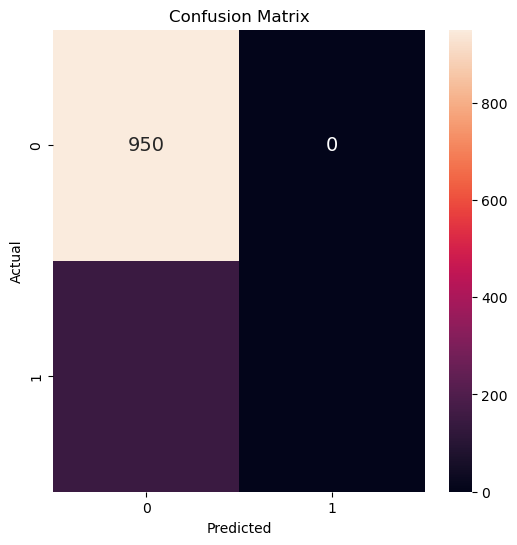

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=True, annot_kws={"size": 14})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_test[5:10]

3456    0
5128    0
919     0
2505    0
17      0
Name: label_num, dtype: int64

In [ ]:
y_pred[5:10]

array([0, 0, 0, 0, 0], dtype=int64)